# Querying with Pandas


In [6]:
# Obtener nombres de las columnas
import pandas as pd

data = pd.read_csv('sourceData.csv')
list(data)

['idCarpeta',
 'Anio_inicio',
 'Mes_inicio',
 'FechaInicio',
 'Delito',
 'Categoria',
 'Sexo',
 'Edad',
 'TipoPersona',
 'CalidadJuridica',
 'competencia',
 'Anio_hecho',
 'Mes_hecho',
 'FechaHecho',
 'HoraHecho',
 'HoraInicio',
 'alcaldia_hechos',
 'municipio_hechos',
 'colonia_datos',
 'fgj_colonia_registro',
 'latitud',
 'longitud']

In [5]:
# Agrupando numero de casos por Alcaldia
import pandas as pd

data = pd.read_csv('sourceData.csv')
data.groupby("alcaldia_hechos")["idCarpeta"].count()

alcaldia_hechos
ALVARO OBREGON             68712
AZCAPOTZALCO               46764
BENITO JUAREZ              71920
CDMX                        1372
COYOACAN                   65008
CUAJIMALPA DE MORELOS      15863
CUAUHTEMOC                142798
FUERA DE CDMX              10174
GUSTAVO A. MADERO          99970
IZTACALCO                  41710
IZTAPALAPA                147421
LA MAGDALENA CONTRERAS     18382
MIGUEL HIDALGO             59984
MILPA ALTA                  9068
TLAHUAC                    28537
TLALPAN                    58469
VENUSTIANO CARRANZA        55751
XOCHIMILCO                 32165
Name: idCarpeta, dtype: int64

In [8]:
# Agrupando numero de casos por Alcaldia y Sexo de Ofendidx / Victimx
import pandas as pd

data = pd.read_csv('sourceData.csv')
data.groupby(["alcaldia_hechos", "Sexo"])["idCarpeta"].count()

alcaldia_hechos         Sexo     
ALVARO OBREGON          Femenino     26716
                        Masculino    29836
AZCAPOTZALCO            Femenino     17813
                        Masculino    20112
BENITO JUAREZ           Femenino     25145
                        Masculino    32019
CDMX                    Femenino       702
                        Masculino      501
COYOACAN                Femenino     26048
                        Masculino    28308
CUAJIMALPA DE MORELOS   Femenino      6486
                        Masculino     6442
CUAUHTEMOC              Femenino     49810
                        Masculino    61922
FUERA DE CDMX           Femenino      3973
                        Masculino     5341
GUSTAVO A. MADERO       Femenino     39806
                        Masculino    41244
IZTACALCO               Femenino     16840
                        Masculino    18865
IZTAPALAPA              Femenino     55349
                        Masculino    63165
LA MAGDALENA CONTRER

<Axes: >

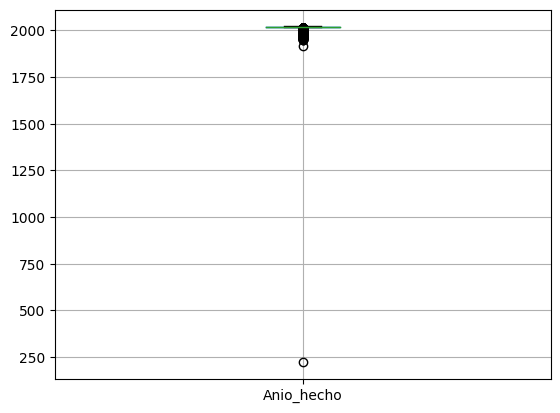

In [14]:
# BoxPlot para Anio Hecho
import pandas as pd

data = pd.read_csv('sourceData.csv')
data.boxplot(column='Anio_hecho')

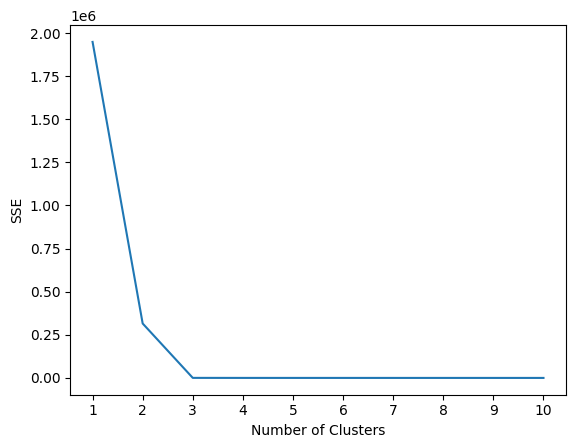

In [30]:
# Clustering Coordinates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('sourceData.csv')
# First we find the number of Alcaldias
n = len(pd.unique(data["alcaldia_hechos"]))

# Selecting Coordinates
df = data[['longitud', 'latitud']].copy()
# Cleaning data (eliminating rows with NaN)
df = df.dropna()

# Use StandardScaler() to scale each variable to have a mean of 0 and a standard deviation of 1
scaled_df = StandardScaler().fit_transform(df)

# Elbow Method
##initialize kmeans parameters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}

##create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

##visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()